# Flight Fare Prediction System 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only 1 null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Dataframe is having only 1 integer variable.i.e, Price(dependent variable)

In [8]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
33h 20m      1
4h 10m       1
32h 55m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Hence, no null value

In [11]:
df.shape

(10682, 11)

# EDA

In [12]:
df['Journey_day']=pd.to_datetime(df.Date_of_Journey, format= '%d/%m/%Y').dt.day

In [13]:
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'], format= '%d/%m/%Y').dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
#As we have already extract the Date and Month and created a new variable in numeric form, thats why we are deleting the Date_Of_Journey column
df.drop(['Date_of_Journey'],inplace=True, axis=1)

In [16]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

In [17]:
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.drop(['Dep_Time'],axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

In [21]:
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [22]:
df.drop(['Arrival_Time'],inplace=True,axis=1)

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
df.shape

(10682, 14)

In [25]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else: 
            duration[i]='0h ' + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [26]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
df.drop(['Duration'],inplace=True,axis=1)

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

We are using OneHotEncoding for Nominal data (datas not in any order)
And We are using LabelEncoder for ordinal data(datas in order)

In [30]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

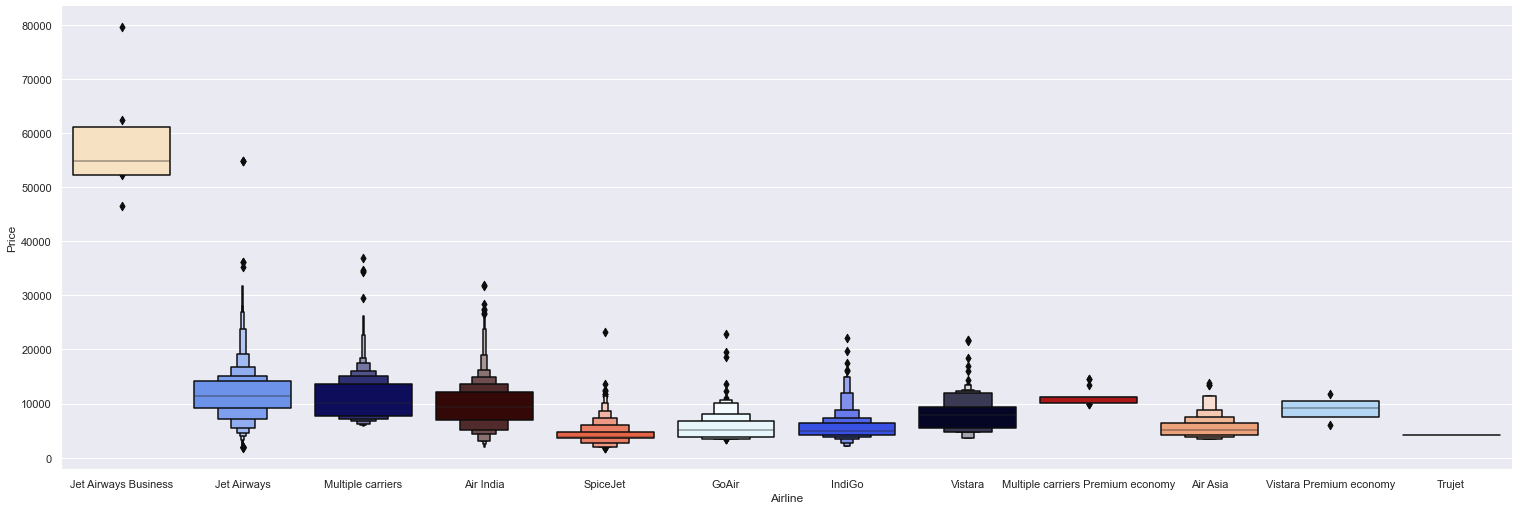

In [31]:
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=7,aspect=3,palette='flag')

In [32]:
# As Airline is a Nominal Categorical Data, we will perfom OneHotEncoding
Airline= df[['Airline']]
Airline= pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

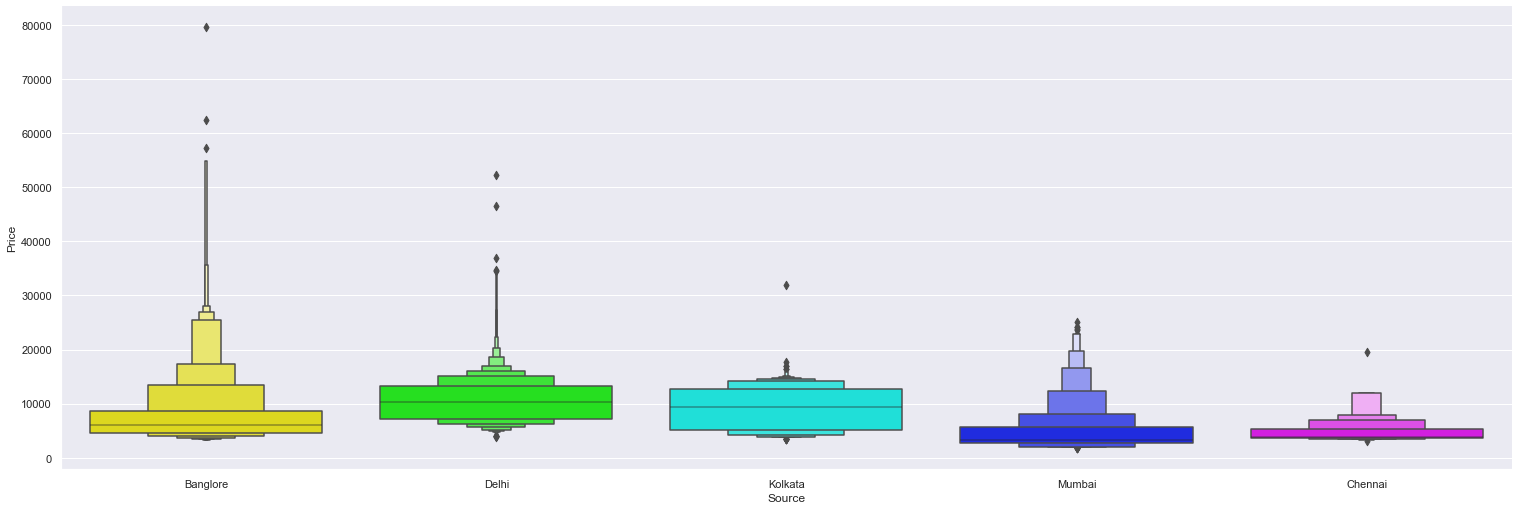

In [34]:
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=7,aspect=3,palette='hsv')

In [35]:
# As source is also a Nominal Category we will apply OneHotEncoding
Source=df[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# As Destination is also a Nominal Category we will apply OneHotEncoding
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
# Additional Info contains almost 80% no info
# Route and Total_stops are related to each other
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [40]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
def stops(ty):
    if ty['Total_Stops']=='non-stop':
        return 0
    elif ty['Total_Stops']=='1 stop':
        return 1
    elif ty['Total_Stops']=='2 stops':
        return 2
    elif ty['Total_Stops']=='3 stops':
        return 3
    else:
        return 4
df['Total_Stops']=df.apply(stops,axis=1)

In [42]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
# Concatenating Dataframe with  Airline Source Destination 
df_final= pd.concat([df,Airline,Source,Destination],axis=1)

In [44]:
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
df_final.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [46]:
df_final.shape

(10682, 30)

In [47]:
df_final.head()

,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


The reason we are Processing Train and Test data separately as because of Data Leakage problem

# Test_Set

In [48]:
df_test=pd.read_excel('Test_set.xlsx')
pd.set_option('display.max_columns', None)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EDA

In [49]:
df_test.shape

(2671, 10)

In [50]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [51]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [52]:
df_test.drop(['Additional_Info'],axis=1,inplace=True)

In [53]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop


In [54]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
def stop(ou):
    if ou['Total_Stops']=='non-stop':
        return 0
    elif ou['Total_Stops']=='1 stop':
        return 1
    elif ou['Total_Stops']=='2 stops':
        return 2
    elif ou['Total_Stops']=='3 stops':
        return 3
    else:
        return 4
df_test['Total_Stops']= df_test.apply(stop,axis=1)

In [56]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0


In [57]:
df_test['Journey_day']=pd.to_datetime(df_test.Date_of_Journey, format= '%d/%m/%Y').dt.day

In [58]:
df_test['Journey_month']=pd.to_datetime(df_test.Date_of_Journey, format= '%d/%m/%Y').dt.month

In [59]:
df_test.drop(['Date_of_Journey'],inplace=True, axis=1)

In [60]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,24,6


In [61]:
df_test['Arrival_hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(['Arrival_Time'],inplace=True, axis=1)
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,0,24,6,2,45


In [62]:
df_test['Dep_hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Dep_minute']=pd.to_datetime(df_test.Dep_Time).dt.minute
df_test.drop(['Dep_Time'],inplace=True, axis=1)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,24,6,2,45,23,55


In [63]:
duration=list(df_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else: 
            duration[i]='0h ' + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [64]:
df_test['Duration_hours']=duration_hours
df_test['Duration_mins']=duration_hours

In [65]:
df_test.drop(['Duration'],axis=1,inplace=True)

In [66]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,6,6,4,25,17,30,10,10
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,12,5,10,20,6,20,4,4
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,21,5,19,0,19,15,23,23
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,21,5,21,0,8,0,13,13
4,Air Asia,Banglore,Delhi,BLR → DEL,0,24,6,2,45,23,55,2,2


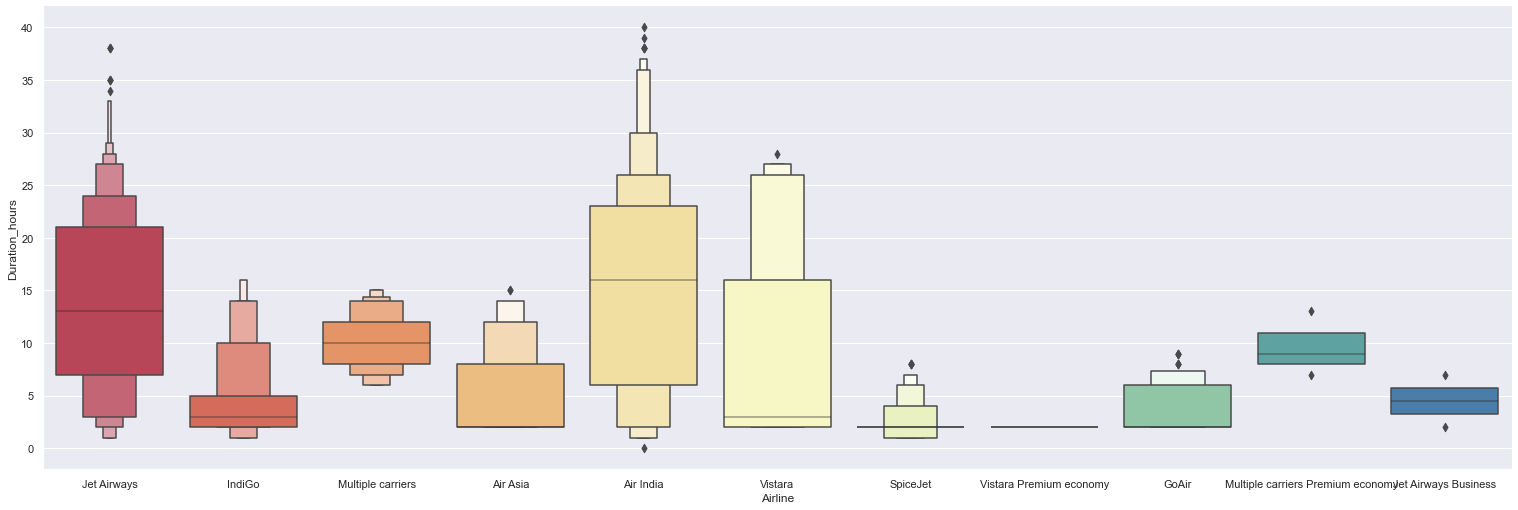

In [67]:
sns.catplot(y='Duration_hours',x='Airline',data=df_test,kind='boxen',height=7,aspect=3,palette='Spectral')

In [68]:
# As Airline is a Nominal Categorical Data, we will perfom OneHotEncoding
Airline= df_test[['Airline']]
Airline= pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [69]:
# As Source is a Nominal Categorical Data, we will perfom OneHotEncoding
Source= df_test[['Source']]
Source= pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [70]:
# As Destination is a Nominal Categorical Data, we will perfom OneHotEncoding
Destination= df_test[['Destination']]
Destination= pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [71]:
df_test.drop(['Route'],inplace=True,axis=1)

In [72]:
# Concatenating Dataframe with  Airline Source Destination 
df_test_final= pd.concat([df_test,Airline,Source,Destination],axis=1)

In [73]:
df_test_final.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,10,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,4,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,23,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,13,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
df_test_final.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [75]:
df_test_final.shape

(2671, 28)

In [76]:
df_test_final.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,4,25,17,30,10,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,23,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [77]:
df_final.shape

(10682, 30)

In [78]:
df_final.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Dep_hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [79]:
x=df_final.loc[:,['Total_Stops','Journey_day', 'Journey_Month', 'Dep_hour',
       'Dep_Min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
y=df_final.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

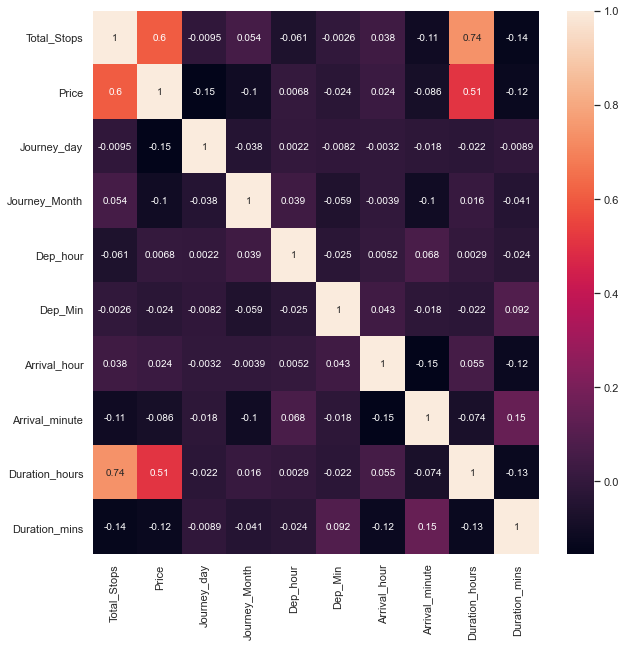

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [83]:
print(selection.feature_importances_)

[2.43793831e-01 1.43204126e-01 5.37683901e-02 2.45014200e-02
 2.08976683e-02 2.80346123e-02 1.90032824e-02 1.10988741e-01
 1.72463596e-02 1.09390185e-02 2.00376837e-03 1.86871082e-02
 1.32073311e-01 6.73065656e-02 2.08008228e-02 8.61445890e-04
 3.29475574e-03 7.57847002e-05 5.02110462e-03 7.48669523e-05
 4.34071797e-04 7.54969591e-03 3.06401219e-03 6.28168260e-03
 1.18700153e-02 1.62572670e-02 6.62643965e-03 4.65604869e-04
 2.48742284e-02]


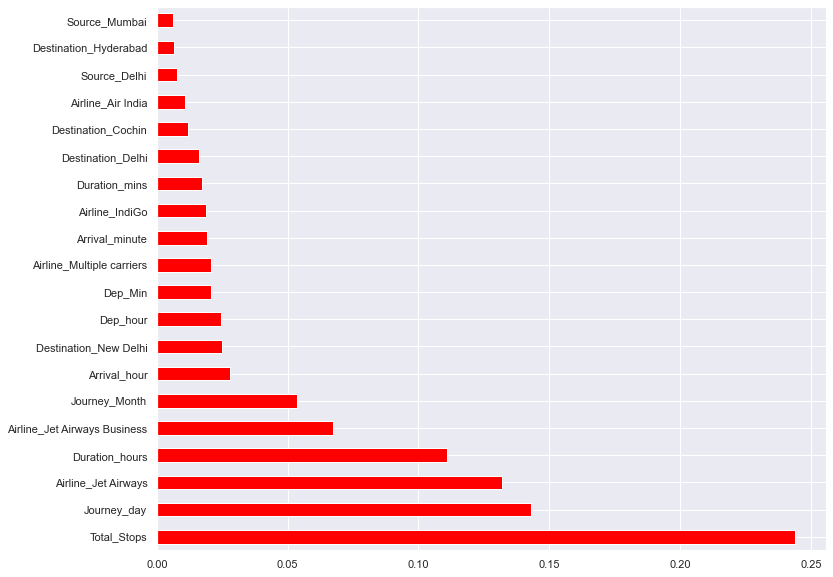

In [84]:
plt.figure(figsize=(12,10))
var_importances=pd.Series(selection.feature_importances_, index=x.columns)
var_importances.nlargest(20).plot(kind='barh',color='red')
plt.show()

In [85]:
# Total Stops are playing the most important role 

# Random Forest

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2,random_state=123)

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg= RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
y_pred=reg.predict(x_test)

In [89]:
reg.score(x_train,y_train)

0.9522662250957898

In [90]:
reg.score(x_test,y_test)

0.8361412885381271

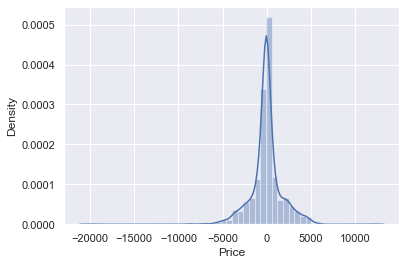

In [91]:
sns.distplot(y_test-y_pred)
plt.show()

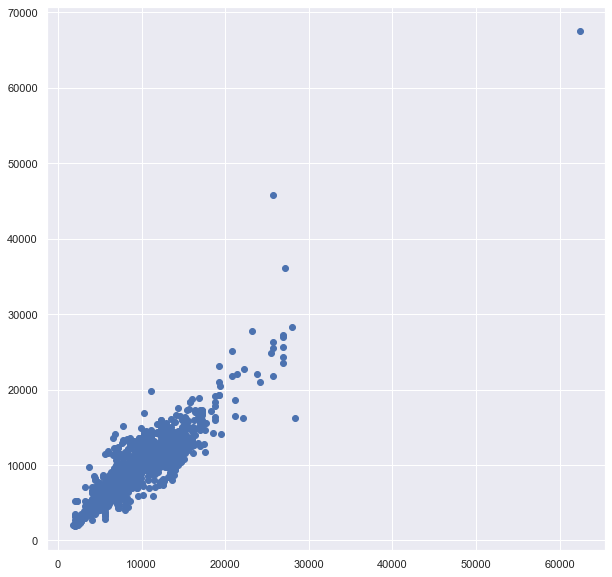

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred)
plt.show()

In [93]:
from sklearn import metrics

In [94]:
print("MAE(Mean_Absolute_Error)=\t",metrics.mean_absolute_error(y_test,y_pred))
print("MSE(Mean_Squared_Error)=\t",metrics.mean_squared_error(y_test,y_pred))
print("RMSE(Root_Mean_Squared_Error)=\t",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE(Mean_Absolute_Error)=	 1109.2724077961632
MSE(Mean_Squared_Error)=	 3155210.5123796156
RMSE(Root_Mean_Squared_Error)=	 1776.2912239775367


In [95]:
metrics.r2_score(y_test,y_pred)

0.8361412885381271

# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num =6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [98]:
# Create a random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_split}

In [99]:
rf_random = RandomizedSearchCV(estimator=reg, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42,n_jobs=1)

In [100]:
# n_iter
# CV= Cross validation will split the selected features as per my train_test_split divisions .i.e, 80% train and 20% test in
#      random mode
# Verbose= it helps to see the process running as my messages, just like below case
# random state= it will help us to get the same accuracy level when run on different systems.
# n_jobs= it will help to assign the whole process directly to cpu and ram of system

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   6.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   5.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   5.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   5.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=15, min_samples_split

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15, 100],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [102]:
prediction=rf_random.predict(x_test)

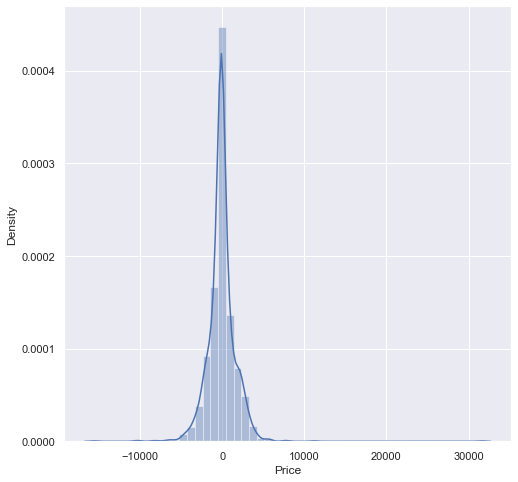

In [103]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

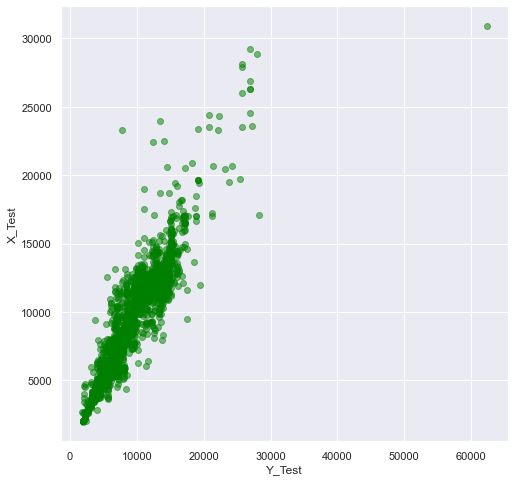

In [104]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5,color='green')
plt.xlabel('Y_Test')
plt.ylabel('X_Test')
plt.show()

In [105]:
print("MAE(Mean_Absolute_Error)=\t",metrics.mean_absolute_error(y_test,prediction))
print("MSE(Mean_Squared_Error)=\t",metrics.mean_squared_error(y_test,prediction))
print("RMSE(Root_Mean_Squared_Error)=\t",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2_Score(R_Squared)=\t',metrics.r2_score(y_test,prediction))

MAE(Mean_Absolute_Error)=	 1102.0209840320244
MSE(Mean_Squared_Error)=	 3147358.476685053
RMSE(Root_Mean_Squared_Error)=	 1774.079613964676
R2_Score(R_Squared)=	 0.8365490662271958


# Save the model to reuse it again

In [106]:
import pickle
file= open('Flight_Fare_Prediction.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)

In [107]:
model=open('Flight_Fare_Prediction.pkl','rb')
forest= pickle.load(model)

In [108]:
y_prediction=forest.predict(x_test)

In [109]:
metrics.r2_score(y_test, y_prediction)

0.8365490662271958